## Assignments

Read about (Susanna Epp pp. 704):
1. Kruskal's Algorithm
2. Prim's Algorithm
3. Djitraka's Shortest Path Algorithm

Given the following graph, implement the algorithm in Python.

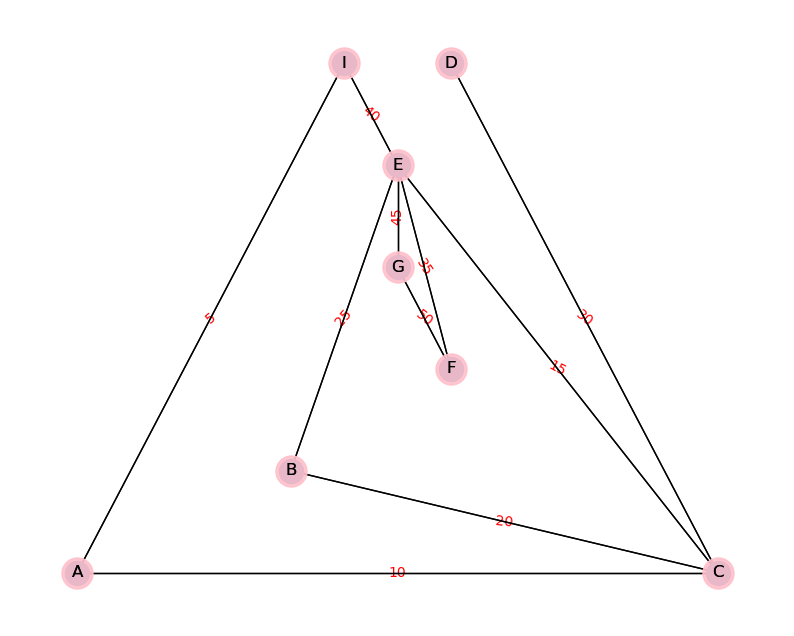

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

Shortest path lengths from node A: {'A': 0, 'I': 5, 'C': 10, 'E': 25, 'B': 30, 'D': 40, 'F': 60, 'G': 70}


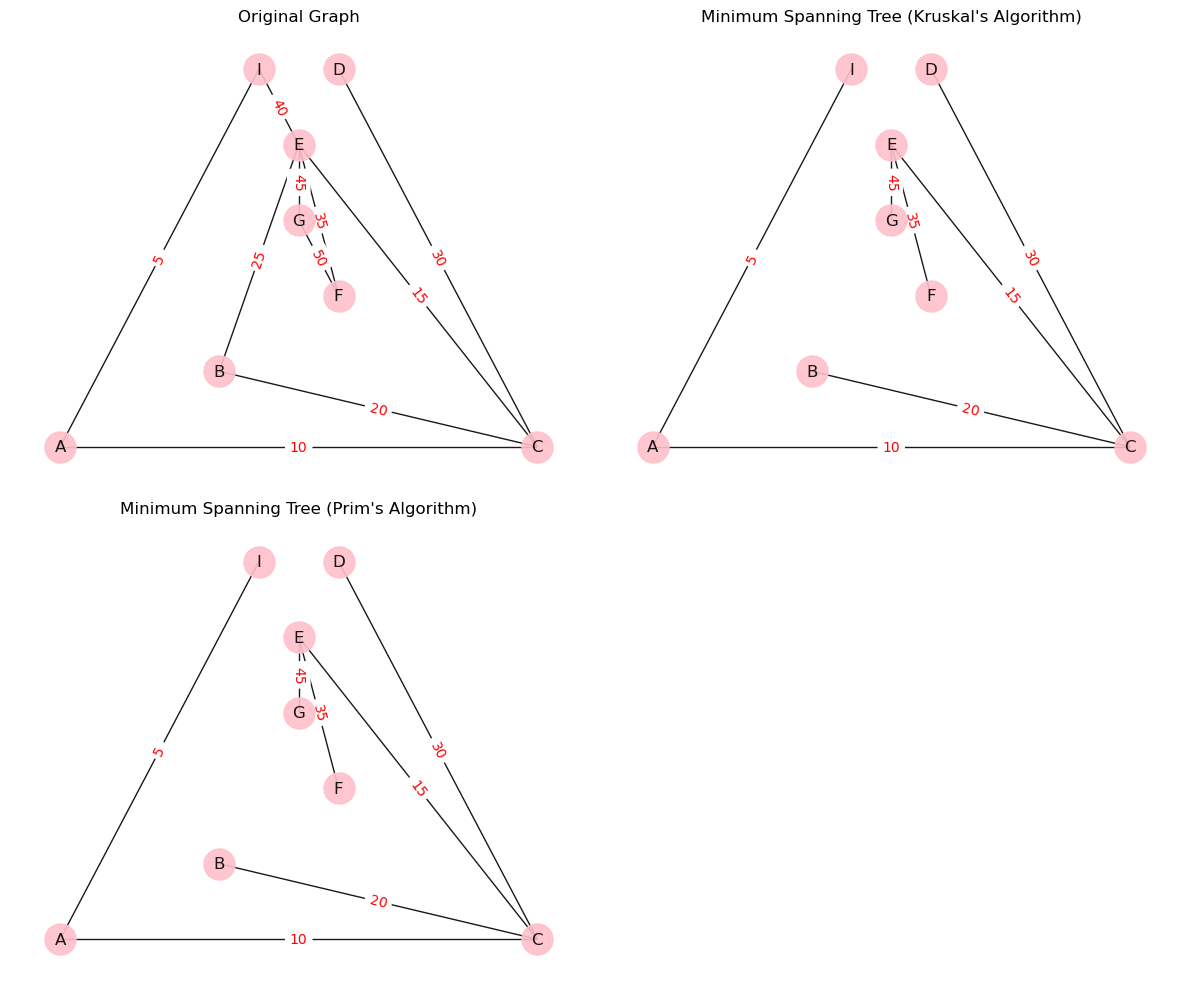

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

# Create the graph and add nodes/edges
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "I"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30),
            ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

# Position nodes using planar layout
pos = nx.planar_layout(G)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot the original graph
axs[0, 0].set_title("Original Graph")
nx.draw(G, pos, with_labels=True, node_color='pink', node_size=500, edge_color='black', width=1, alpha=0.9, ax=axs[0, 0])
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', ax=axs[0, 0])

# Kruskal's Algorithm
mst_kruskal = nx.minimum_spanning_tree(G, algorithm='kruskal')
axs[0, 1].set_title("Minimum Spanning Tree (Kruskal's Algorithm)")
nx.draw(mst_kruskal, pos, with_labels=True, node_color='pink', node_size=500, edge_color='black', width=1, alpha=0.9, ax=axs[0, 1])
nx.draw_networkx_edge_labels(mst_kruskal, pos, edge_labels={(u, v): d['weight'] for u, v, d in mst_kruskal.edges(data=True)}, font_color='red', ax=axs[0, 1])

# Prim's Algorithm
mst_prim = nx.minimum_spanning_tree(G, algorithm='prim')
axs[1, 0].set_title("Minimum Spanning Tree (Prim's Algorithm)")
nx.draw(mst_prim, pos, with_labels=True, node_color='pink', node_size=500, edge_color='black', width=1, alpha=0.9, ax=axs[1, 0])
nx.draw_networkx_edge_labels(mst_prim, pos, edge_labels={(u, v): d['weight'] for u, v, d in mst_prim.edges(data=True)}, font_color='red', ax=axs[1, 0])

# Dijkstra's Shortest Path Algorithm from node 'A'
shortest_paths = nx.single_source_dijkstra_path_length(G, source='A')
print("Shortest path lengths from node A:", shortest_paths)

# Hide the empty subplot
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()
